### Introduction

We recently launched a new range of office supplies to stimulate creativity and facilitate brainstorming sessions. Three sales strategies were tested: email, telephone call and a combination of the two. The aim of this analysis is to assess the effectiveness of each method.

This report presents the validation and cleaning of the data, the results of the exploratory analysis, a key indicator to monitor, and recommendations for improving sales performance and ensuring the success of this range.

In [35]:
#import all python required library do perform the task

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

### Data validation

Describe validation and cleaning steps for every column in the data

The initial dataset contains 15000 rows and 8 columns


1 - The week column contains 6 Distinct value from 1 to 6 
corresponding to the week since the product has been launched
there is no null value. No changes is necessary



2 - The sales_method contains 5 Distinct values that are :
['Email', 'Email + Call', 'Call', 'em + call', 'email'].
There is no null values. There should only be 3 distinct values corresponding to each sales method ['Email', 'Email + Call', 'Call'].

After analyzing these values, it appears to be insertion errors like capitalization and abbreviations. After making the necessary adjustments, the column will contain only three distinct value types, each corresponding to one of the sales methods: Email, Call, and Email + Call.


3 - The customer_id column contains customer identification values.
There are 15000 distinct values and 0 null. So, no need to make changes

4 - The nb_sold column contains 10 distinct values with 0 null. So no need to make changes

5 - The revenue column contains 1074 missing values. I decided that the best approach would be to replace the missing values with the mean, calculated separately for each sales method.

6 - The year_as_customer column contains 42 distinct values with no null value. But there are 2 values : 47 and 63 that are not normal.
As the company was founded in 1984 the maximum value should be 40 in 2024. So I could be insertion mistake. these values will be replace by 40

7 - The nb_site_visits has 27 distinct values and no missing value. No change needed

8 - The state field has 50 distinct values and no missing values. No change needed in this column



In [36]:
#import the data and stock it in df and see it preview
df = pd.read_csv("product_sales.csv")
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [37]:
#see the dataFrame shape (how many rows and columns)
df.shape

(15000, 8)

In [38]:
#little global information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [39]:
#the minimum, maximum, mean, and distribution of values across different numerical columns
df.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


In [40]:
#see the distinct values available in sales_method field
df['sales_method'].unique()

array(['Email', 'Email + Call', 'Call', 'em + call', 'email'],
      dtype=object)

In [41]:
df['sales_method'].value_counts()

Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: sales_method, dtype: int64

In [42]:
#replace the inconsistent values with their appropriate one
df['sales_method'] = df['sales_method'].replace({
    'em + call':'Email + Call',
    'email':'Email'
})

#check the distinct values ensure if there are only 3 unique values
df['sales_method'].value_counts()

Email           7466
Call            4962
Email + Call    2572
Name: sales_method, dtype: int64

In [43]:
#find mean revenu for each sale method
df.groupby('sales_method')['revenue'].mean()

sales_method
Call             47.597467
Email            97.127684
Email + Call    183.651233
Name: revenue, dtype: float64

In [44]:

#replace them by the mean
df['revenue'] = df['revenue'].fillna(df.groupby('sales_method')['revenue'].transform('mean'))


In [45]:
#check if there are any null value in the revenu field
df['revenue'].isnull().sum()

0

In [46]:
#find outliers in year_as_customer
from datetime import datetime

current_year = datetime.now().year

df[df['years_as_customer'] > (current_year - 1984)]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


In [47]:
print((current_year - 1984))

40


In [48]:
#replace year_as_customer outliers with the max
df.loc[df['years_as_customer'] > (current_year - 1984), 'years_as_customer'] = (current_year - 1984)

In [52]:
#check if year_as_customer outliers has been removed
df[df['years_as_customer'] > (current_year - 1984)]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state


In [53]:
#number of unique values in state
df['state'].nunique()

50

In [55]:
#find duplicated
df.duplicated().value_counts()

False    15000
dtype: int64

In [56]:
#recheck global information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            15000 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


#### Exploratory Analysis to answer the customer questions

1- Number of customer for each approach (sales method)

In [58]:
different_method_df = df['sales_method'].value_counts()

In [59]:
different_method_df

Email           7466
Call            4962
Email + Call    2572
Name: sales_method, dtype: int64

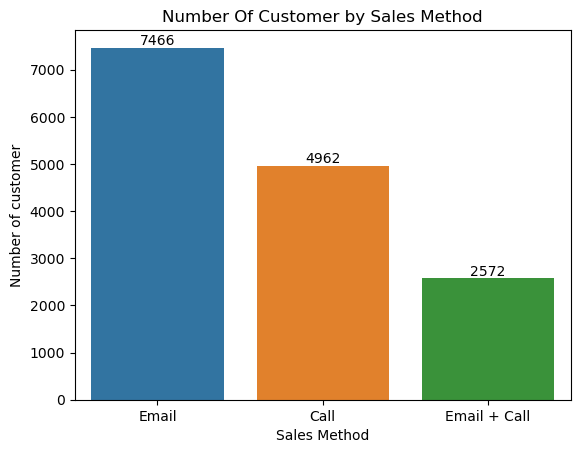

In [64]:
sns.barplot(x=different_method_df.index, y=different_method_df.values)
plt.title("Number Of Customer by Sales Method")
plt.xlabel("Sales Method")
plt.ylabel("Number of customer")

for index, value in enumerate(different_method_df.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

2 - A : the spread of the revenue look like for overall method

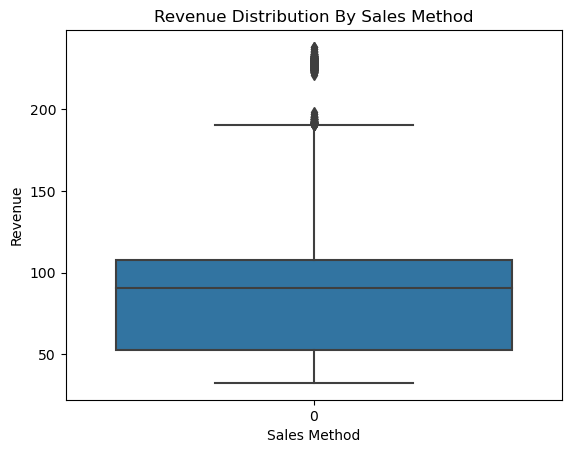

In [70]:
sns.boxplot(df['revenue'])
plt.title("Revenue Distribution By Sales Method")
plt.xlabel("Sales Method")
plt.ylabel("Revenue")

plt.show()

2 - B : the spread of the revenue look like for each method

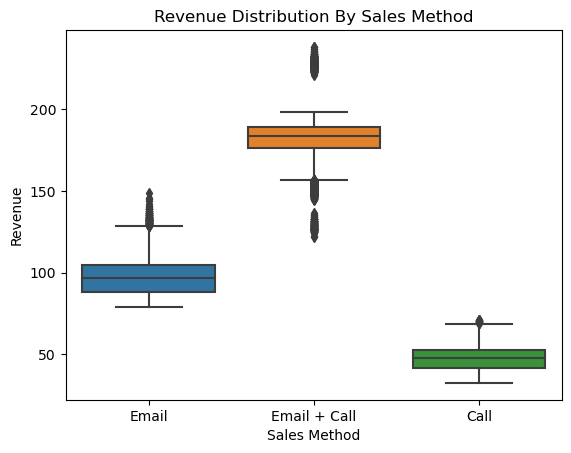

In [67]:
sns.boxplot(y=df['revenue'], x=df['sales_method'])
plt.title("Revenue Distribution By Sales Method")
plt.xlabel("Sales Method")
plt.ylabel("Revenue")

plt.show()